#### Import Required Libraries

In [1]:
import os
import pydicom  
import numpy as np
import matplotlib.pyplot as plt
import dicom2nifti

#### Load a DICOM file

In [3]:
dicom_file_path = './T2/1-15.dcm'
dicom_data = pydicom.dcmread(dicom_file_path)

#### Print the DICOM header

In [4]:
print(dicom_data)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 196
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: MR Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.4429.7055.724371543136943134706840295337
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002, 0013) Implementation Version Name         SH: 'dcm4che-1.4.35'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'M', 'NORM', 'DIS2D']
(0008, 0016) SOP Class UID                       UI: MR Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1.4429.7055.724371543136943134706840295337
(0008, 0020) Stud

#### Display the DICOM image 

In [7]:
dicom_array = dicom_data.pixel_array

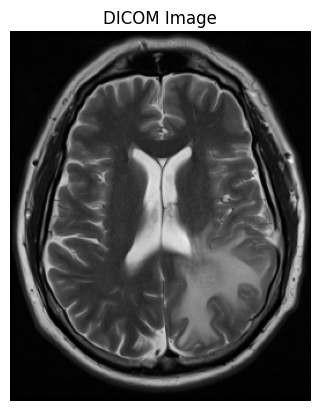

In [8]:
plt.imshow(dicom_array, cmap='gray')
plt.title('DICOM Image')
plt.axis('off')
plt.show()

In [9]:
print(dicom_array.shape)

(320, 260)


In [11]:
np.min(dicom_array)

0

### Create a stack of DICOM files representing a volume

In [12]:

# Directory containing DICOM files
dicom_dir = './T2'
# List all DICOM files in the directory
dicom_files = [os.path.join(dicom_dir, f) for f in sorted(os.listdir(dicom_dir)) if f.endswith('.dcm')]

# Read all DICOM files
dicom_images = [pydicom.dcmread(file).pixel_array for file in dicom_files]

# Create a 3D volume
volume = np.stack(dicom_images, axis=-1)

#### Function to display 3D volume  

In [13]:
from ipywidgets import interact
def explore_3D_array(arr: np.ndarray, cmap: str = 'gray'):
  """
  Given a 3D array with shape (X,Y,Z) This function will create an interactive
  widget to check out all the 2D arrays with shape (X,Y) inside the 3D array. 
  
  Args:
    arr : 3D array with shape (X,Y,Z) that represents the volume 
    cmap : Which color map use to plot the slices in matplotlib.pyplot
  """

  def fn(SLICE):
    plt.figure(figsize=(7,7))
    plt.imshow(arr[:, :, SLICE], cmap=cmap)

  interact(fn, SLICE=(0, arr.shape[2]-1))

In [14]:
explore_3D_array(volume)

interactive(children=(IntSlider(value=11, description='SLICE', max=23), Output()), _dom_classes=('widget-inter…

In [7]:
dicom2nifti.convert_directory(dicom_dir, dicom_dir, compression=True, reorient=True)

In [11]:
volume.max()

1820

In [2]:
import os
import glob

In [12]:
root_dir = "C:/Users/deepanshu.sharma/OneDrive - Plaksha University/Desktop/sample_data/"

In [9]:
dicom_file_path = (glob.glob("C:/Users/deepanshu.sharma/OneDrive - Plaksha University/Desktop/sample_data/CT/*/*.dcm"))

In [10]:
dicom_file_path

['C:/Users/deepanshu.sharma/OneDrive - Plaksha University/Desktop/sample_data/CT\\2021-08-25 154705\\IMG-0001-00001.dcm',
 'C:/Users/deepanshu.sharma/OneDrive - Plaksha University/Desktop/sample_data/CT\\2021-08-25 154705\\IMG-0001-00002.dcm',
 'C:/Users/deepanshu.sharma/OneDrive - Plaksha University/Desktop/sample_data/CT\\2021-08-25 154705\\IMG-0001-00003.dcm',
 'C:/Users/deepanshu.sharma/OneDrive - Plaksha University/Desktop/sample_data/CT\\2021-08-25 154705\\IMG-0001-00004.dcm',
 'C:/Users/deepanshu.sharma/OneDrive - Plaksha University/Desktop/sample_data/CT\\2021-08-25 154705\\IMG-0001-00005.dcm',
 'C:/Users/deepanshu.sharma/OneDrive - Plaksha University/Desktop/sample_data/CT\\2021-08-25 154705\\IMG-0001-00006.dcm',
 'C:/Users/deepanshu.sharma/OneDrive - Plaksha University/Desktop/sample_data/CT\\2021-08-25 154705\\IMG-0002-00001.dcm',
 'C:/Users/deepanshu.sharma/OneDrive - Plaksha University/Desktop/sample_data/CT\\2021-08-25 154705\\IMG-0002-00002.dcm',
 'C:/Users/deepanshu.sha

In [13]:
for root, dirs, files in os.walk(root_dir):
    print(root)
    print(dirs)
    print(files)

C:/Users/deepanshu.sharma/OneDrive - Plaksha University/Desktop/sample_data/
['BrainMR', 'CT', 'Mammo', 'Ultrasound']
[]
C:/Users/deepanshu.sharma/OneDrive - Plaksha University/Desktop/sample_data/BrainMR
['PGBM-001', 'PGBM-002']
[]
C:/Users/deepanshu.sharma/OneDrive - Plaksha University/Desktop/sample_data/BrainMR\PGBM-001
['04-02-1992-FH-HEADBrain Protocols-79896', '11-19-1991-FH-HEADBrain Protocols-40993']
[]
C:/Users/deepanshu.sharma/OneDrive - Plaksha University/Desktop/sample_data/BrainMR\PGBM-001\04-02-1992-FH-HEADBrain Protocols-79896
['11.000000-T1post-80644', '29904.000000-dT1-04743', '34907.000000-T1prereg-43695', '35623.000000-FLAIRreg-79237', '35624.000000-ADCreg-47789', '35628.000000-sRCBVreg-27603', '35629.000000-nRCBVreg-30349', '35630.000000-nCBFreg-63461', '37908.000000-T2reg-21119', '5388.000000-MaskTumor-63335']
[]
C:/Users/deepanshu.sharma/OneDrive - Plaksha University/Desktop/sample_data/BrainMR\PGBM-001\04-02-1992-FH-HEADBrain Protocols-79896\11.000000-T1post-806